In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [358]:
file_path = file_path = r"H:\Downloads\Heart (1) - Heart (1).csv"
df = pd.read_csv(file_path)

In [360]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [362]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [379]:
imputer = SimpleImputer(strategy="median")
df["Ca"] = imputer.fit_transform(df[["Ca"]])

In [381]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [383]:
label_encoders = {}
for col in ["ChestPain", "Thal", "AHD"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [385]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [387]:
X = df.drop(columns=["AHD"]) 
y = df["AHD"]

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [391]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [393]:
y_pred = model.predict(X_test)


In [395]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [397]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[28  5]
 [ 2 26]]
Accuracy: 0.8852459016393442
Precision: 0.8387096774193549
Recall: 0.9285714285714286
F1 Score: 0.8813559322033898


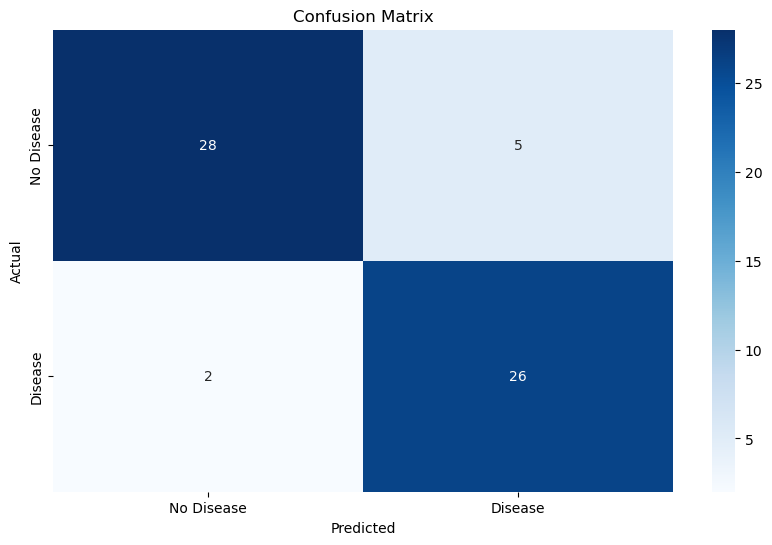

In [399]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [402]:

for col in ["ChestPain", "Thal", "AHD"]:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in ChestPain: [3 0 1 2]
Unique values in Thal: [0 1 2 3]
Unique values in AHD: [0 1]


In [426]:
df.isin([286]).any()


Age          False
Sex          False
ChestPain    False
RestBP       False
Chol          True
Fbs          False
RestECG      False
MaxHR        False
ExAng        False
Oldpeak      False
Slope        False
Ca           False
Thal         False
AHD          False
dtype: bool